In [1]:
from utils import *
features, labels, handles = initial_processing("default_of_credit_card_clients.xls")
"""
Lets already get rid of redundant features 
Using a threshold ϵ = 0.95, such that
above it, features with cov > ϵ get selected
and the one with the lowest KW score gets eliminated
"""
features = redundancy_check(features, 0.95, labels)
classifiers = ["euclidean", "mahalanobis"]

In [4]:
#"Vanilla" 
for classifier in classifiers:
    run(features, labels, 10, 0.7, 0.15, classifier = classifier)

Training error: 0.4645 ± 0.0018
Validation error: 0.4605 ± 0.0090
Execution time: 62.39
Training error: 0.3029 ± 0.0034
Validation error: 0.3023 ± 0.0070
Execution time: 56.66


In [5]:
# with PCA (kaiser)
for classifier in classifiers:
    run(PCA(features, kaiser), labels, 10, 0.7, 0.15, classifier = classifier)

Training error: 0.3625 ± 0.0015
Validation error: 0.3629 ± 0.0082
Execution time: 45.68
Training error: 0.3496 ± 0.0024
Validation error: 0.3524 ± 0.0073
Execution time: 47.28


In [2]:
# with PCA (scree, ϵ = 1e-1)
for classifier in classifiers:
    run(PCA(features, scree), labels, 10, 0.7, 0.15, classifier = classifier)

Training error: 0.3704 ± 0.0038
Validation error: 0.3715 ± 0.0074
Execution time: 44.80
Training error: 0.3562 ± 0.0029
Validation error: 0.3552 ± 0.0067
Execution time: 45.33


In [3]:
# With Fisher LDA
run(LDA(features, labels), labels, 10, 0.7, 0.15, classifier = "euclidean")

Training error: 0.2748 ± 0.0026
Validation error: 0.2784 ± 0.0079
Execution time: 40.57


Training error: 0.2730 ± 0.0020
Validation error: 0.2737 ± 0.0052
Testing error: 0.2773
Confusion matrix: [[2011 1659]
 [ 837 6989]]
Accuracy: 0.7829
Precision: 0.7061
Sensitivity: 0.5480
Specificity: 0.8930
F1 score: 0.6171
AUC: 0.7094
Execution time: 42.16


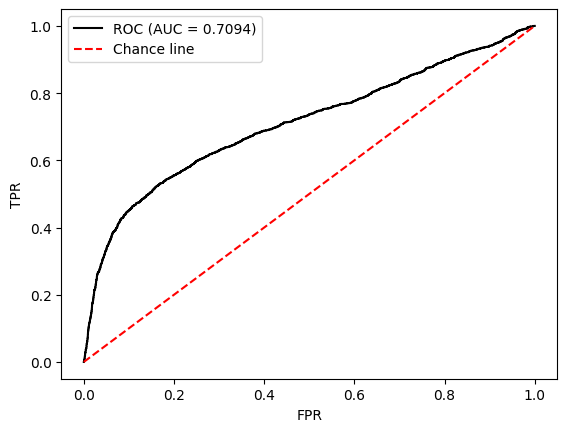

In [2]:
"""
Based on these results, we'll use Fisher LDA
to check with the testing dataset, as it had
the lowest validation errors
"""
run(LDA(features, labels), labels, 10, 0.7, 0.15, classifier = "euclidean",
   testing=True, plot=True)